<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r11-abc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

Train Data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r11/2-fft-normal-n-0-3-r11.csv?token=AKVFSODZWH5Y27EIWDV36PC6ZQD4O')
print(df.shape)
df

(49198, 30)


timestamp  outport  inport  ...  vnet_vc_index  vnet_vc_cc_index  target
0            146        3       4  ...             85               100       1
1            147        3       4  ...             85               100       1
2            148        3       4  ...             85               100       1
3            149        3       4  ...             85               100       1
4            153        3       4  ...             85               100       1
...          ...      ...     ...  ...            ...               ...     ...
49193    3269159        0       3  ...             27                45       1
49194    3269166        0       3  ...             27                45       1
49195    3269173        0       3  ...             27                45       1
49196    3269180        0       3  ...             27                45       1
49197    3269181        0       3  ...             30                 9       1

[49198 rows x 30 columns]

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r11/2-fft-malicious-n-0-3-m-1-r11.csv?token=AKVFSOFJIUEYJ64IEFLW3KK6ZQD4S',nrows=51000)
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r11/2-fft-malicious-n-0-3-m-6-r11.csv?token=AKVFSOHMQBTANKYQPYDDYL26ZQD4W',nrows=51000)
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r11/2-fft-malicious-n-0-3-m-9-r11.csv?token=AKVFSOB3WXDJK5BS5YUTY2S6ZQD4Y',nrows=51000)
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r11/2-fft-malicious-n-0-3-m-14-r11.csv?token=AKVFSOG6AI6DIL3WNUUKNUK6ZQD5I',nrows=51000)

df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r11/2-fft-normal-n-0-5-r11.csv?token=AKVFSOD77C4ONIEDBPO47U26ZQEEI')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r11/2-fft-normal-n-0-12-r11.csv?token=AKVFSODNDAJLWFRNXGFSNPC6ZQEEM')
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r11/2-fft-normal-n-0-15-r11.csv?token=AKVFSODS3ZO4VI6PAGQNB626ZQEEQ')

In [0]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df11.shape)
print(df12.shape)
print(df13.shape)

(51000, 30)
(51000, 30)
(51000, 30)
(51000, 30)
(40971, 30)
(43866, 30)
(67771, 30)


In [0]:
df = df.append(df1, ignore_index=True,sort=False)
df = df.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)
df = df.append(df13, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [0]:
df = pd.read_csv('fft-r1-train.csv')
df

timestamp  outport  inport  ...  vnet_vc_index  vnet_vc_cc_index  target
0              11        3       1  ...             27                 9       1
1              15        3       4  ...             27                 9       0
2              15        3       1  ...             27                 9       0
3              23        3       1  ...             27                 9       1
4              58        1       3  ...             85               100       1
...           ...      ...     ...  ...            ...               ...     ...
405801    3275770        0       4  ...             27                27       1
405802    3275771        1       4  ...             85               100       1
405803    3275772        1       4  ...             85               100       1
405804    3275773        1       4  ...             85               100       1
405805    3275774        1       4  ...             85               100       1

[405806 rows x 30 columns]

In [0]:
df.shape

(405806, 30)

Test Data

In [0]:
df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r11/2-fft-malicious-n-0-3-m-2-r11.csv?token=AKVFSOEK7WLJAX3UK6H4HKS6ZQEJ2',nrows=30000)
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r11/2-fft-malicious-n-0-3-m-5-r11.csv?token=AKVFSOHSLKONNNAZXFF7ZAS6ZQEKA',nrows=30000)
df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r11/2-fft-malicious-n-0-3-m-10-r11.csv?token=AKVFSOB7HBQQAG3SUEKUSXK6ZQEKE',nrows=30000)
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r11/2-fft-malicious-n-0-3-m-12-r11.csv?token=AKVFSOF6BUT5Z6ZPSHEIIN26ZQEKI',nrows=30000)
df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r11/2-fft-malicious-n-0-3-m-13-r11.csv?token=AKVFSOCXSFAOZK7SMEJCB3C6ZQEKO',nrows=30000)
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r11/2-fft-malicious-n-0-3-m-15-r11.csv?token=AKVFSOGKZ7P4TBIHQD7JEKS6ZQEKU',nrows=30000)

df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r11/2-fft-normal-n-0-10-r11.csv?token=AKVFSOFFLOM6D7MBDWXWPKK6ZQET6',nrows=30000)
df5.shape

(30000, 30)

In [0]:
df5

timestamp  outport  inport  ...  vnet_vc_index  vnet_vc_cc_index  target
0            146        3       4  ...             85               100       0
1            147        3       4  ...             85               100       0
2            148        3       4  ...             85               100       0
3            149        3       4  ...             85               100       0
4            153        3       4  ...             85               100       0
...          ...      ...     ...  ...            ...               ...     ...
29995    1842352        4       0  ...             90               100       0
29996    1842435        0       1  ...             27                54       0
29997    1842442        0       1  ...             27                54       0
29998    1842449        0       1  ...             27                54       0
29999    1842456        0       1  ...             27                54       0

[30000 rows x 30 columns]

In [0]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [0]:
df.corr()

outport    inport  ...  vnet_vc_cc_index    target
outport                     1.000000 -0.396959  ...          0.481649 -0.060520
inport                     -0.396959  1.000000  ...         -0.100926 -0.005798
cache_coherence_type       -0.190512 -0.033636  ...          0.108250 -0.003819
flit_id                     0.013121 -0.003776  ...          0.319569  0.005865
flit_type                  -0.020065  0.005775  ...         -0.489216 -0.008939
vnet                        0.539331 -0.082806  ...          0.912868  0.023751
vc                          0.614101 -0.196940  ...          0.869902  0.013453
traversal_id               -0.020953 -0.015647  ...         -0.023599 -0.089407
hop_count                   0.291448  0.321817  ...          0.207810  0.079918
current_hop                -0.641688  0.688002  ...         -0.332822  0.056011
hop_percentage             -0.908124  0.555611  ...         -0.485175  0.023899
enqueue_time               -0.599115  0.371519  ...         -0.571895  0.018018
packet_count_decr          -0.094310  0.023766  ...         -0.083133 -0.150216
packet_count_incr           0.129255 -0.120179  ...          0.066466 -0.150143
max_packet_count            0.022114 -0.061041  ...         -0.010562 -0.190189
packet_count_index          0.023473 -0.062193  ...         -0.020288 -0.172424
packet_max_index            0.012940 -0.051337  ...         -0.027163 -0.160217
port_index                  0.147859  0.702256  ...          0.219412 -0.090707
cache_coherence_flit_index -0.125896 -0.024322  ...          0.177514  0.000355
flit_index                 -0.091043 -0.017104  ...          0.103643 -0.000404
traversal_index            -0.081511 -0.021337  ...          0.059162 -0.048094
cache_coherence_vnet_index  0.267634 -0.096826  ...          0.834724  0.015837
vnet_vc_index               0.578872 -0.151221  ...          0.896831  0.017546
vnet_vc_cc_index            0.481649 -0.100926  ...          1.000000  0.023172
target                     -0.060520 -0.005798  ...          0.023172  1.000000

[25 rows x 25 columns]

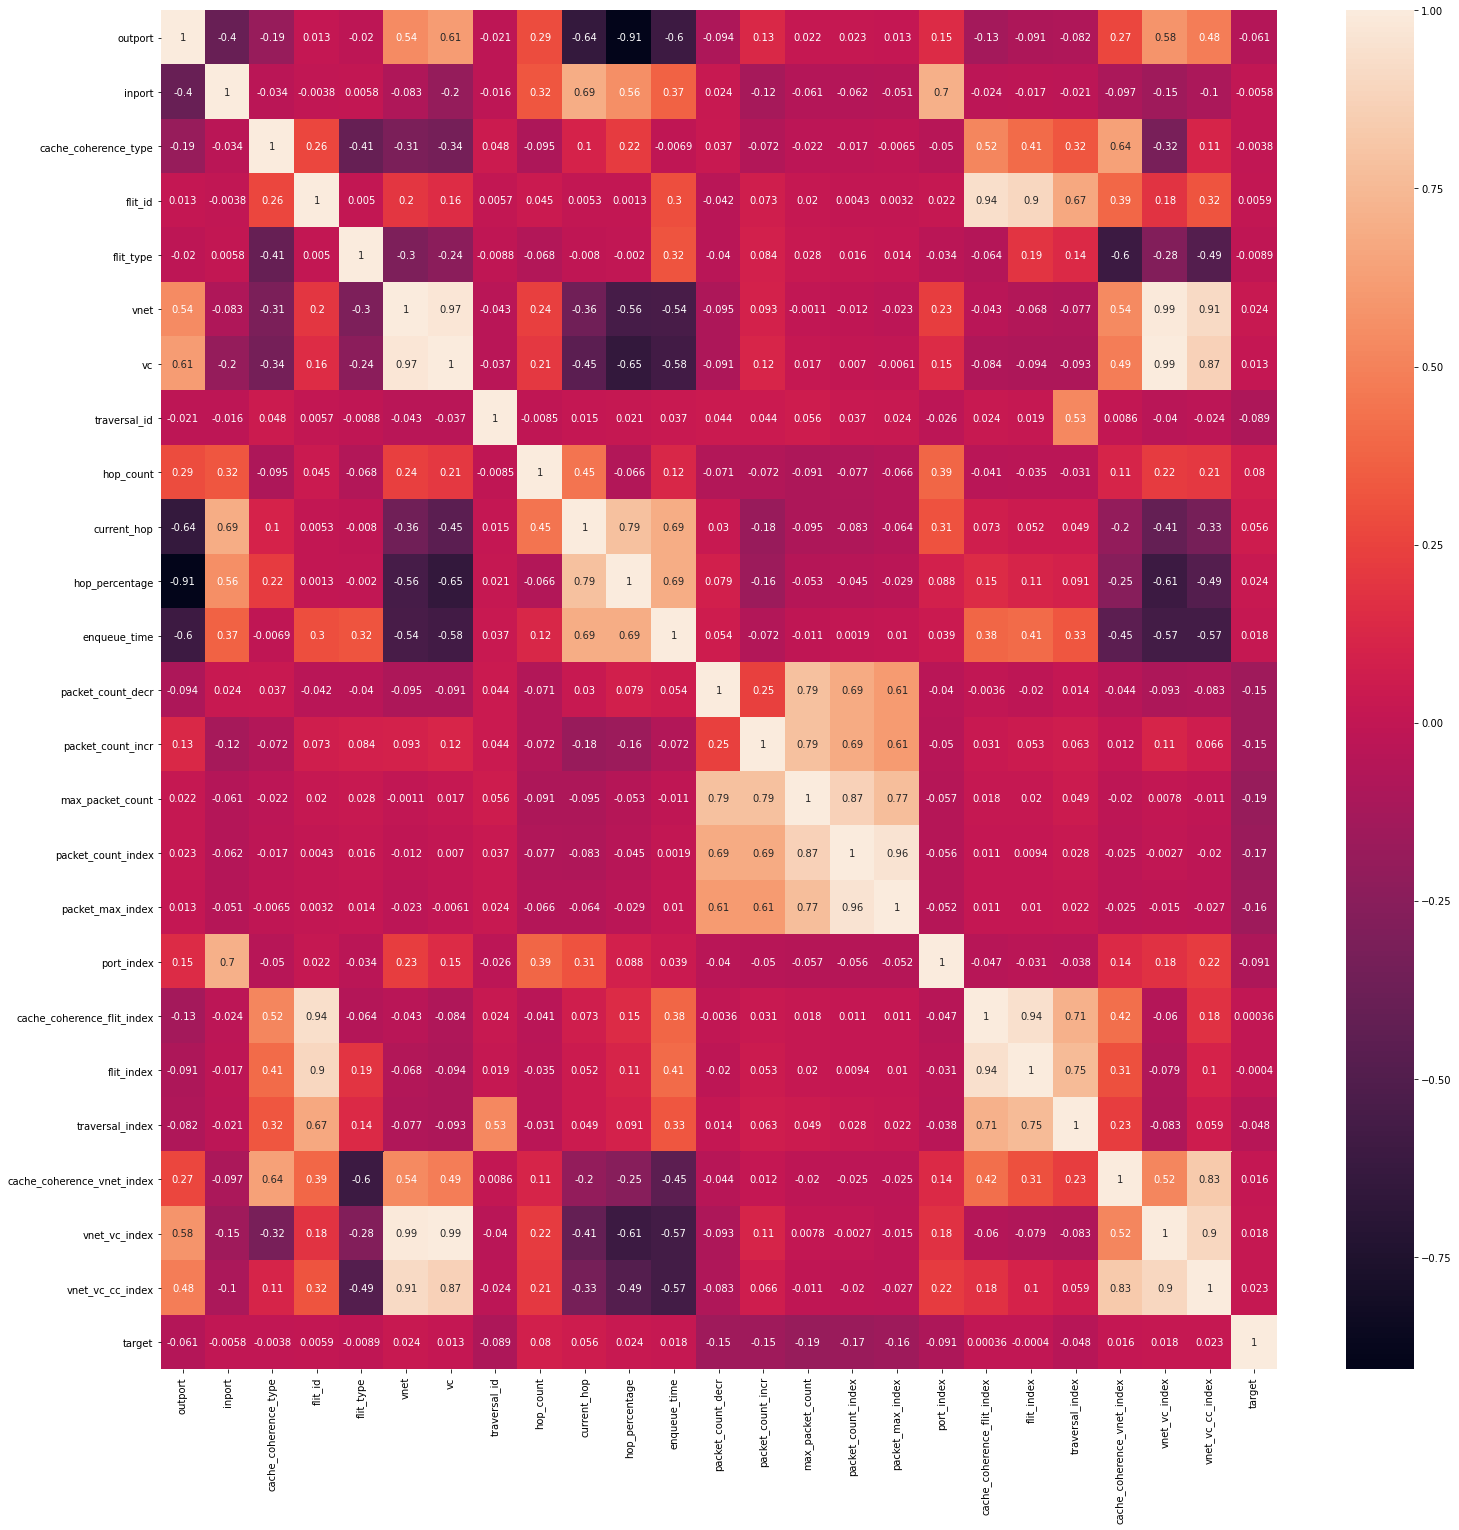

In [0]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_X

outport  inport  ...  vnet_vc_index  vnet_vc_cc_index
0             3       1  ...             27                 9
1             3       4  ...             27                 9
2             3       1  ...             27                 9
3             3       1  ...             27                 9
4             1       3  ...             85               100
...         ...     ...  ...            ...               ...
405801        0       4  ...             27                27
405802        1       4  ...             85               100
405803        1       4  ...             85               100
405804        1       4  ...             85               100
405805        1       4  ...             85               100

[405806 rows x 24 columns]

In [0]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

outport  inport  ...  vnet_vc_index  vnet_vc_cc_index
0          0.75    0.25  ...       0.000000          0.000000
1          0.75    1.00  ...       0.000000          0.000000
2          0.75    0.25  ...       0.000000          0.000000
3          0.75    0.25  ...       0.000000          0.000000
4          0.25    0.75  ...       0.794521          1.000000
...         ...     ...  ...            ...               ...
405801     0.00    1.00  ...       0.000000          0.197802
405802     0.25    1.00  ...       0.794521          1.000000
405803     0.25    1.00  ...       0.794521          1.000000
405804     0.25    1.00  ...       0.794521          1.000000
405805     0.25    1.00  ...       0.794521          1.000000

[405806 rows x 24 columns]

In [0]:
train_X[train_X.duplicated()].shape

(9337, 24)

In [0]:
test_X = df5.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df5['target']

In [0]:
#standardization
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
test_X

outport  inport  ...  vnet_vc_index  vnet_vc_cc_index
0         0.75    1.00  ...       0.794521          1.000000
1         0.75    1.00  ...       0.794521          1.000000
2         0.75    1.00  ...       0.794521          1.000000
3         0.75    1.00  ...       0.794521          1.000000
4         0.75    1.00  ...       0.794521          1.000000
...        ...     ...  ...            ...               ...
29995     1.00    0.00  ...       0.863014          1.000000
29996     0.00    0.25  ...       0.000000          0.494505
29997     0.00    0.25  ...       0.000000          0.494505
29998     0.00    0.25  ...       0.000000          0.494505
29999     0.00    0.25  ...       0.000000          0.494505

[30000 rows x 24 columns]

In [0]:
test_X[test_X.duplicated()].shape

(0, 24)

In [0]:
test_X1 = df6.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y1 = df6['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)
test_X1

(0, 24)


outport  inport  ...  vnet_vc_index  vnet_vc_cc_index
0         0.75    1.00  ...       0.794521          1.000000
1         0.75    1.00  ...       0.794521          1.000000
2         0.75    1.00  ...       0.794521          1.000000
3         0.75    1.00  ...       0.794521          1.000000
4         0.75    1.00  ...       0.794521          1.000000
...        ...     ...  ...            ...               ...
29995     0.25    0.75  ...       0.041096          0.000000
29996     0.00    0.25  ...       0.000000          0.494505
29997     0.00    0.25  ...       0.000000          0.494505
29998     0.00    0.25  ...       0.000000          0.494505
29999     0.00    0.25  ...       0.000000          0.494505

[30000 rows x 24 columns]

In [0]:
test_X2 = df7.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y2 = df7['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)
test_X2

(0, 24)


outport  inport  ...  vnet_vc_index  vnet_vc_cc_index
0         0.75    1.00  ...       0.000000          0.000000
1         0.75    1.00  ...       0.794521          1.000000
2         0.75    1.00  ...       0.794521          1.000000
3         0.75    1.00  ...       0.794521          1.000000
4         0.75    1.00  ...       0.794521          1.000000
...        ...     ...  ...            ...               ...
29995     0.25    0.75  ...       0.041096          0.000000
29996     0.25    1.00  ...       0.000000          0.395604
29997     0.25    1.00  ...       0.000000          0.395604
29998     0.25    1.00  ...       0.000000          0.395604
29999     0.00    0.25  ...       0.000000          0.494505

[30000 rows x 24 columns]

In [0]:
test_X3 = df8.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y3 = df8['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)
test_X3

(0, 24)


outport  inport  ...  vnet_vc_index  vnet_vc_cc_index
0         0.75    0.25  ...       0.000000          0.000000
1         0.75    1.00  ...       0.794521          1.000000
2         0.75    1.00  ...       0.794521          1.000000
3         0.75    1.00  ...       0.794521          1.000000
4         0.75    1.00  ...       0.794521          1.000000
...        ...     ...  ...            ...               ...
29995     1.00    0.00  ...       0.931507          1.000000
29996     0.00    0.75  ...       0.000000          0.395604
29997     0.00    0.75  ...       0.000000          0.395604
29998     0.00    0.75  ...       0.000000          0.395604
29999     0.00    0.75  ...       0.000000          0.395604

[30000 rows x 24 columns]

In [0]:
test_X4 = df9.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y4 = df9['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)
test_X4

(0, 24)


outport  inport  ...  vnet_vc_index  vnet_vc_cc_index
0         0.75    0.25  ...       0.000000          0.000000
1         0.75    1.00  ...       0.794521          1.000000
2         0.75    1.00  ...       0.794521          1.000000
3         0.75    1.00  ...       0.794521          1.000000
4         0.75    1.00  ...       0.794521          1.000000
...        ...     ...  ...            ...               ...
29995     1.00    0.00  ...       0.082192          0.494505
29996     1.00    0.00  ...       0.082192          0.494505
29997     1.00    0.00  ...       0.082192          0.494505
29998     1.00    0.00  ...       0.082192          0.494505
29999     1.00    0.00  ...       0.123288          0.098901

[30000 rows x 24 columns]

In [0]:
test_X5 = df10.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y5 = df10['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)
test_X5

(0, 24)


outport  inport  ...  vnet_vc_index  vnet_vc_cc_index
0         0.75    0.25  ...       0.000000          0.000000
1         0.25    0.75  ...       0.794521          1.000000
2         0.25    0.75  ...       0.794521          1.000000
3         0.25    0.75  ...       0.794521          1.000000
4         0.25    0.75  ...       0.794521          1.000000
...        ...     ...  ...            ...               ...
29995     0.00    0.25  ...       0.000000          0.494505
29996     0.00    0.25  ...       0.000000          0.494505
29997     0.00    0.25  ...       0.000000          0.494505
29998     0.00    0.25  ...       0.000000          0.494505
29999     0.00    0.25  ...       0.041096          0.098901

[30000 rows x 24 columns]

In [0]:
test_X6 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y6 = df14['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)
test_X6

(36, 24)


outport  inport  ...  vnet_vc_index  vnet_vc_cc_index
0         0.75    1.00  ...       0.000000          0.000000
1         0.75    1.00  ...       0.000000          0.000000
2         0.75    1.00  ...       0.000000          0.000000
3         0.00    0.25  ...       0.000000          0.098901
4         1.00    0.00  ...       0.000000          0.197802
...        ...     ...  ...            ...               ...
29995     1.00    0.00  ...       0.000000          0.494505
29996     1.00    0.00  ...       0.000000          0.494505
29997     1.00    0.00  ...       0.000000          0.494505
29998     1.00    0.00  ...       0.000000          0.494505
29999     1.00    0.00  ...       0.041096          0.098901

[30000 rows x 24 columns]

#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [0]:
train_Y = df['target']
train_Y.value_counts()

0    204000
1    201806
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                 Specs        Score
14    max_packet_count  2930.816123
17          port_index  1686.697644
15  packet_count_index  1533.627716
12   packet_count_decr  1475.964856
13   packet_count_incr  1454.890996
16    packet_max_index  1164.580967
0              outport   473.744755
7         traversal_id   415.178627
8            hop_count   371.549374
9          current_hop   327.261483
20     traversal_index   148.386115
5                 vnet   116.261630
10      hop_percentage    69.466657
22       vnet_vc_index    51.625607
23    vnet_vc_cc_index    29.967465
6                   vc    26.705950
11        enqueue_time    16.048364


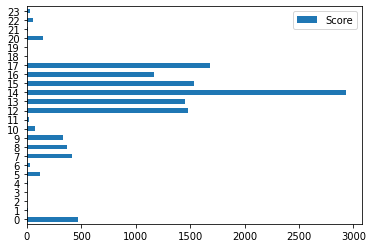

In [0]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [0]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 62.31903254025949
Test Prediction  62.192898154308665


In [0]:
y_pred_test = logreg.predict(test_X)
logreg_score_test = accuracy_score(test_Y,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  49.053333333333335


In [0]:
y_pred_test = logreg.predict(test_X1)
logreg_score_test = accuracy_score(test_Y1,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  49.25


In [0]:
y_pred_test = logreg.predict(test_X2)
logreg_score_test = accuracy_score(test_Y2,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  60.97


In [0]:
y_pred_test = logreg.predict(test_X3)
logreg_score_test = accuracy_score(test_Y3,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  55.36333333333333


In [0]:
y_pred_test = logreg.predict(test_X4)
logreg_score_test = accuracy_score(test_Y4,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  58.18333333333333


In [0]:
y_pred_test = logreg.predict(test_X5)
logreg_score_test = accuracy_score(test_Y5,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  48.39333333333333


In [0]:
y_pred_test = logreg.predict(test_X6)
logreg_score_test = accuracy_score(test_Y6,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  52.43


In [0]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

feature  importance
6                           vc    6.498686
15          packet_count_index    4.035999
5                         vnet    4.034247
23            vnet_vc_cc_index    2.140232
8                    hop_count    1.956491
21  cache_coherence_vnet_index    0.618356
11                enqueue_time    0.543222
1                       inport    0.256664
4                    flit_type    0.202513
3                      flit_id    0.169994
19                  flit_index   -0.089445
20             traversal_index   -0.123052
18  cache_coherence_flit_index   -0.408126
7                 traversal_id   -0.633167
13           packet_count_incr   -0.675876
12           packet_count_decr   -0.749146
10              hop_percentage   -1.027134
9                  current_hop   -1.099665
2         cache_coherence_type   -1.174643
17                  port_index   -1.261391
14            max_packet_count   -1.425022
0                      outport   -2.035491
16            packet_max_index   -7.211903
22               vnet_vc_index  -12.383869

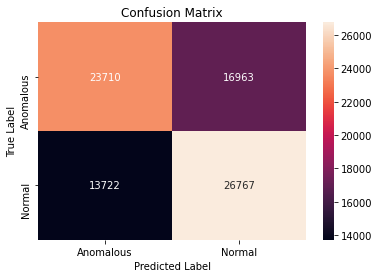

In [0]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.58      0.61     40673
           1       0.61      0.66      0.64     40489

    accuracy                           0.62     81162
   macro avg       0.62      0.62      0.62     81162
weighted avg       0.62      0.62      0.62     81162



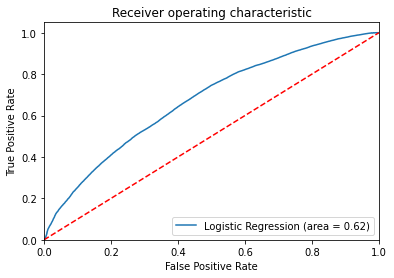

In [0]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

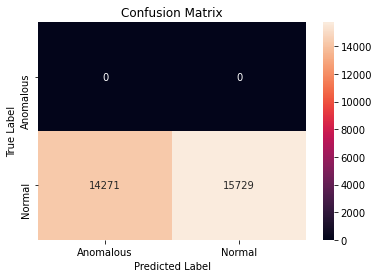

In [0]:
cm = confusion_matrix(test_Y6, y_pred_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y6, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.52      0.69     30000

    accuracy                           0.52     30000
   macro avg       0.50      0.26      0.34     30000
weighted avg       1.00      0.52      0.69     30000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighbors Classifier

In [0]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [0]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 84.71279309027734
Test Prediction  76.78347009684336


In [0]:
y_pred_knn_test= knn.predict(test_X)
knn_score_test = accuracy_score(test_Y,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  56.403333333333336


In [0]:
y_pred_knn_test= knn.predict(test_X1)
knn_score_test = accuracy_score(test_Y1,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  56.220000000000006


In [0]:
y_pred_knn_test= knn.predict(test_X2)
knn_score_test = accuracy_score(test_Y2,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  73.60333333333332


In [0]:
y_pred_knn_test= knn.predict(test_X3)
knn_score_test = accuracy_score(test_Y3,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  58.906666666666666


In [0]:
y_pred_knn_test= knn.predict(test_X4)
knn_score_test = accuracy_score(test_Y4,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  56.41333333333334


In [0]:
y_pred_knn_test= knn.predict(test_X5)
knn_score_test = accuracy_score(test_Y5,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  38.85666666666667


In [0]:
y_pred_knn_test= knn.predict(test_X6)
knn_score_test = accuracy_score(test_Y6,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  33.25333333333334


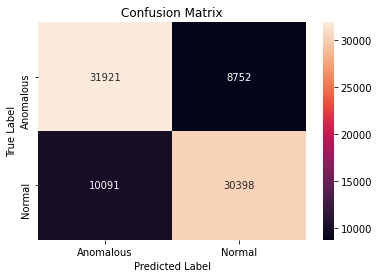

In [0]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77     40673
           1       0.78      0.75      0.76     40489

    accuracy                           0.77     81162
   macro avg       0.77      0.77      0.77     81162
weighted avg       0.77      0.77      0.77     81162



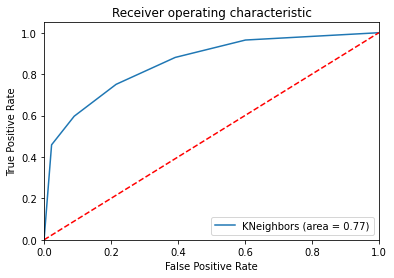

In [0]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

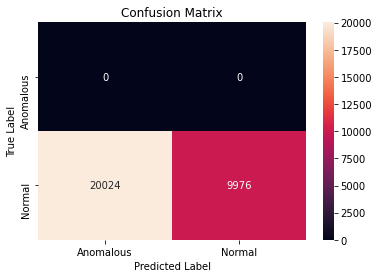

In [0]:
cm = confusion_matrix(test_Y6, y_pred_knn_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y6,y_pred_knn_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.33      0.50     30000

    accuracy                           0.33     30000
   macro avg       0.50      0.17      0.25     30000
weighted avg       1.00      0.33      0.50     30000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [0]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [0]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 60.194859600054215
Test Prediction Score 60.26095956235677


In [0]:
y_pred_nb_test= nb.predict(test_X)
nb_score_test = accuracy_score(test_Y,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)

Test Prediction Score 29.60333333333333


In [0]:
y_pred_nb_test= nb.predict(test_X1)
nb_score_test = accuracy_score(test_Y1,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  29.609999999999996


In [0]:
y_pred_nb_test= nb.predict(test_X2)
nb_score_test = accuracy_score(test_Y2,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  41.48


In [0]:
y_pred_nb_test= nb.predict(test_X3)
nb_score_test = accuracy_score(test_Y3,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  33.95


In [0]:
y_pred_nb_test= nb.predict(test_X4)
nb_score_test = accuracy_score(test_Y4,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  34.589999999999996


In [0]:
y_pred_nb_test= nb.predict(test_X5)
nb_score_test = accuracy_score(test_Y5,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  38.22666666666667


In [0]:
y_pred_nb_test= nb.predict(test_X6)
nb_score_test = accuracy_score(test_Y6,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  75.30666666666667


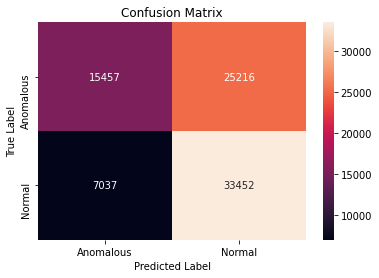

In [0]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.69      0.38      0.49     40673
           1       0.57      0.83      0.67     40489

    accuracy                           0.60     81162
   macro avg       0.63      0.60      0.58     81162
weighted avg       0.63      0.60      0.58     81162



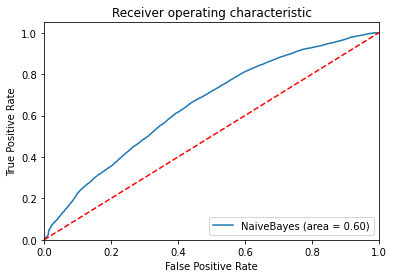

In [0]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [0]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

Using TensorFlow backend.


2-Layer Neural Network

In [0]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 259715 samples, validate on 64929 samples
Epoch 1/10
259715/259715 [==============================] - 9s 35us/step - loss: 0.2205 - accuracy: 0.6239 - val_loss: 0.2116 - val_accuracy: 0.6436
Epoch 2/10
259715/259715 [==============================] - 9s 34us/step - loss: 0.2089 - accuracy: 0.6505 - val_loss: 0.2089 - val_accuracy: 0.6478
Epoch 3/10
259715/259715 [==============================] - 9s 34us/step - loss: 0.2077 - accuracy: 0.6524 - val_loss: 0.2085 - val_accuracy: 0.6488
Epoch 4/10
259715/259715 [==============================] - 9s 34us/step - loss: 0.2072 - accuracy: 0.6535 - val_loss: 0.2079 - val_accuracy: 0.6521
Epoch 5/10
259715/259715 [==============================] - 9s 34us/step - loss: 0.2068 - accuracy: 0.6545 - val_loss: 0.2082 - val_accuracy: 0.6483
Epoch 6/10
259715/259715 [==============================] - 9s 34us/step - loss: 0.2066 - accuracy: 0.6550 - val_loss: 0.2074 - val_accuracy: 0.6549
Epoch 7/10
259715/259715 [=============================

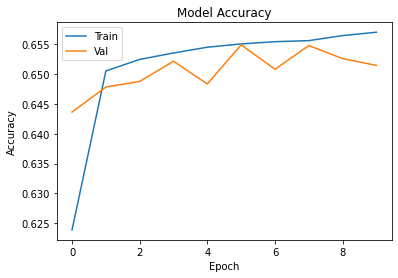

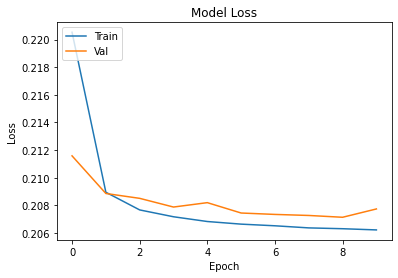

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 65.46%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 58.01%


In [0]:
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 58.57%


In [0]:
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 65.25%


In [0]:
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 48.43%


In [0]:
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 54.63%


In [0]:
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 40.87%


In [0]:
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 52.74%


3-Layer Neural Network

In [0]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2 )

Train on 259715 samples, validate on 64929 samples
Epoch 1/30
259715/259715 [==============================] - 9s 33us/step - loss: 0.2485 - accuracy: 0.5485 - val_loss: 0.2470 - val_accuracy: 0.5595
Epoch 2/30
259715/259715 [==============================] - 9s 33us/step - loss: 0.2440 - accuracy: 0.5742 - val_loss: 0.2412 - val_accuracy: 0.5843
Epoch 3/30
259715/259715 [==============================] - 9s 33us/step - loss: 0.2353 - accuracy: 0.6104 - val_loss: 0.2290 - val_accuracy: 0.6306
Epoch 4/30
259715/259715 [==============================] - 9s 36us/step - loss: 0.2226 - accuracy: 0.6422 - val_loss: 0.2193 - val_accuracy: 0.6479
Epoch 5/30
259715/259715 [==============================] - 9s 34us/step - loss: 0.2155 - accuracy: 0.6536 - val_loss: 0.2141 - val_accuracy: 0.6555
Epoch 6/30
259715/259715 [==============================] - 9s 34us/step - loss: 0.2111 - accuracy: 0.6610 - val_loss: 0.2117 - val_accuracy: 0.6515
Epoch 7/30
259715/259715 [=============================

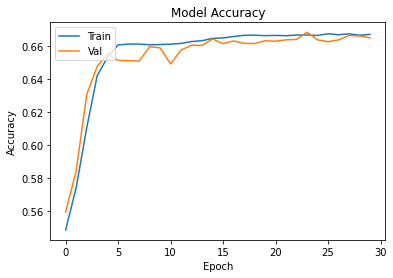

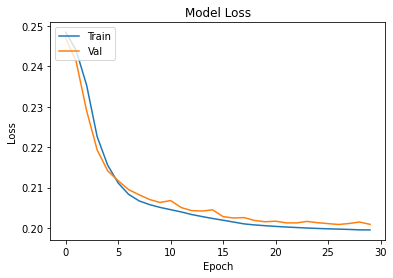

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 66.90%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 66.27%
accuracy: 66.63%
accuracy: 71.72%
accuracy: 55.82%
accuracy: 63.99%
accuracy: 41.94%
accuracy: 43.66%


4-Layer Neural Network



In [0]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 259715 samples, validate on 64929 samples
Epoch 1/30
259715/259715 [==============================] - 9s 35us/step - loss: 0.2492 - accuracy: 0.5182 - val_loss: 0.2478 - val_accuracy: 0.5358
Epoch 2/30
259715/259715 [==============================] - 9s 36us/step - loss: 0.2438 - accuracy: 0.5699 - val_loss: 0.2390 - val_accuracy: 0.5893
Epoch 3/30
259715/259715 [==============================] - 9s 36us/step - loss: 0.2321 - accuracy: 0.6233 - val_loss: 0.2278 - val_accuracy: 0.6317
Epoch 4/30
259715/259715 [==============================] - 9s 36us/step - loss: 0.2239 - accuracy: 0.6368 - val_loss: 0.2210 - val_accuracy: 0.6356
Epoch 5/30
259715/259715 [==============================] - 9s 35us/step - loss: 0.2180 - accuracy: 0.6401 - val_loss: 0.2185 - val_accuracy: 0.6352
Epoch 6/30
259715/259715 [==============================] - 9s 36us/step - loss: 0.2139 - accuracy: 0.6464 - val_loss: 0.2143 - val_accuracy: 0.6434
Epoch 7/30
259715/259715 [=============================

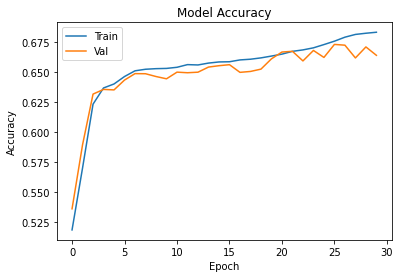

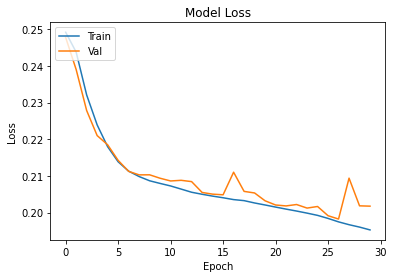

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 66.70%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 70.60%
accuracy: 70.20%
accuracy: 80.70%
accuracy: 64.68%
accuracy: 73.03%
accuracy: 48.65%
accuracy: 33.75%


5-Layer Neural Network Optimized

In [0]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 259715 samples, validate on 64929 samples
Epoch 1/100
259715/259715 [==============================] - 17s 67us/step - loss: 0.2041 - accuracy: 0.6617 - val_loss: 0.1953 - val_accuracy: 0.6794
Epoch 2/100
259715/259715 [==============================] - 17s 65us/step - loss: 0.1929 - accuracy: 0.6822 - val_loss: 0.1916 - val_accuracy: 0.6792
Epoch 3/100
259715/259715 [==============================] - 17s 64us/step - loss: 0.1897 - accuracy: 0.6878 - val_loss: 0.1858 - val_accuracy: 0.6941
Epoch 4/100
259715/259715 [==============================] - 16s 63us/step - loss: 0.1881 - accuracy: 0.6906 - val_loss: 0.1845 - val_accuracy: 0.6976
Epoch 5/100
259715/259715 [==============================] - 16s 63us/step - loss: 0.1873 - accuracy: 0.6923 - val_loss: 0.1852 - val_accuracy: 0.6952
Epoch 6/100
259715/259715 [==============================] - 20s 75us/step - loss: 0.1867 - accuracy: 0.6929 - val_loss: 0.1830 - val_accuracy: 0.6974
Epoch 7/100
259715/259715 [================

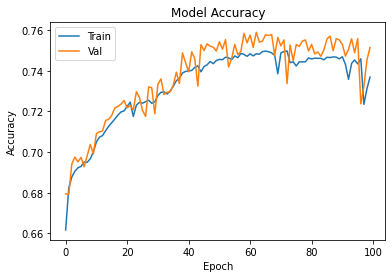

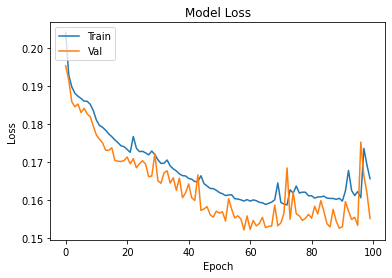

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 75.29%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 61.66%
accuracy: 61.17%
accuracy: 76.61%
accuracy: 61.60%
accuracy: 60.56%
accuracy: 39.51%
accuracy: 32.08%


In [0]:
#6layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(Dense(2))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 259715 samples, validate on 64929 samples
Epoch 1/50
259715/259715 [==============================] - 18s 71us/step - loss: 0.2030 - accuracy: 0.6646 - val_loss: 0.1902 - val_accuracy: 0.6874
Epoch 2/50
259715/259715 [==============================] - 18s 68us/step - loss: 0.1930 - accuracy: 0.6823 - val_loss: 0.1909 - val_accuracy: 0.6814
Epoch 3/50
259715/259715 [==============================] - 18s 69us/step - loss: 0.1912 - accuracy: 0.6847 - val_loss: 0.1863 - val_accuracy: 0.6926
Epoch 4/50
259715/259715 [==============================] - 18s 69us/step - loss: 0.1901 - accuracy: 0.6871 - val_loss: 0.1867 - val_accuracy: 0.6913
Epoch 5/50
259715/259715 [==============================] - 18s 68us/step - loss: 0.1882 - accuracy: 0.6910 - val_loss: 0.2343 - val_accuracy: 0.6196
Epoch 6/50
259715/259715 [==============================] - 18s 67us/step - loss: 0.1984 - accuracy: 0.6725 - val_loss: 0.1898 - val_accuracy: 0.6866
Epoch 7/50
259715/259715 [=======================

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 73.53%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 56.39%
accuracy: 55.64%
accuracy: 72.38%
accuracy: 57.63%
accuracy: 58.59%
accuracy: 39.57%
accuracy: 36.53%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
dt = DecisionTreeClassifier(max_depth=24,max_features=24,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=24, max_features=24, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [0]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 92.2789270708838
Test Prediction Score 88.05845099923609


In [0]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 53.016666666666666
Test Prediction Score 52.693333333333335
Test Prediction Score 58.47666666666667
Test Prediction Score 53.75333333333333
Test Prediction Score 53.49
Test Prediction Score 42.11666666666667
Test Prediction Score 50.49333333333333


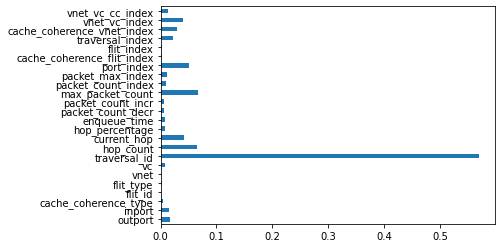

In [0]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

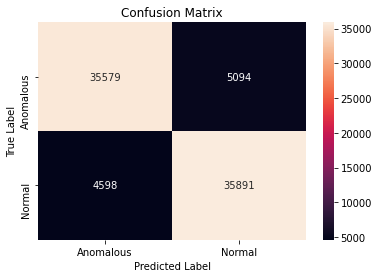

In [0]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88     40673
           1       0.88      0.89      0.88     40489

    accuracy                           0.88     81162
   macro avg       0.88      0.88      0.88     81162
weighted avg       0.88      0.88      0.88     81162



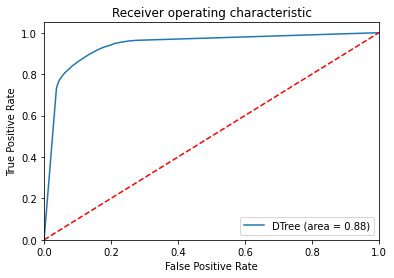

In [0]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier(max_depth=24,max_features=24,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=24, max_features=24,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [0]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 95.96881507127807
Test Prediction Score 90.3218254848328


In [0]:
y_pred_rf_test= rf.predict(test_X)
rf_score_test = accuracy_score(test_Y,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X1)
rf_score_test = accuracy_score(test_Y1,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X2)
rf_score_test = accuracy_score(test_Y2,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X3)
rf_score_test = accuracy_score(test_Y3,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X4)
rf_score_test = accuracy_score(test_Y4,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X5)
rf_score_test = accuracy_score(test_Y5,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X6)
rf_score_test = accuracy_score(test_Y6,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

Test Prediction Score 52.68666666666667
Test Prediction Score 52.843333333333334
Test Prediction Score 57.40666666666666
Test Prediction Score 52.959999999999994
Test Prediction Score 52.85333333333333
Test Prediction Score 42.02666666666667
Test Prediction Score 50.43333333333333


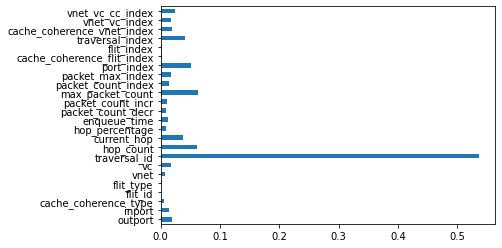

In [0]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

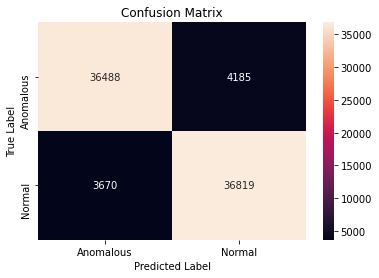

In [0]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90     40673
           1       0.90      0.91      0.90     40489

    accuracy                           0.90     81162
   macro avg       0.90      0.90      0.90     81162
weighted avg       0.90      0.90      0.90     81162



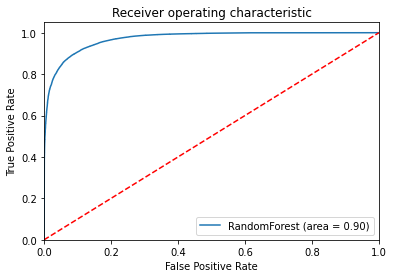

In [0]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [0]:
xgbc = XGBClassifier(max_depth=24,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=24,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [153]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.22191693054546
Test Prediction Score 94.39392819299673


In [154]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 53.16
Test Prediction Score 53.02
Test Prediction Score 65.11333333333333
Test Prediction Score 55.123333333333335
Test Prediction Score 51.970000000000006
Test Prediction Score 39.986666666666665
Test Prediction Score 39.32


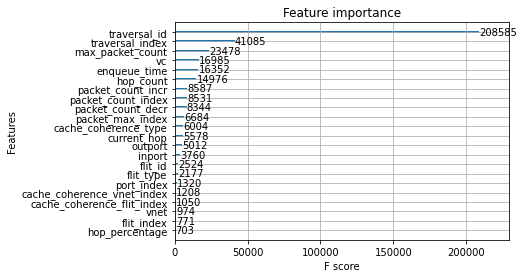

In [155]:
plot_importance(xgbc)
plt.show()

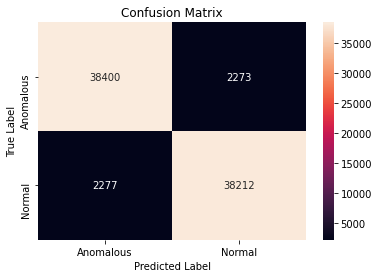

In [156]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [157]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     40673
           1       0.94      0.94      0.94     40489

    accuracy                           0.94     81162
   macro avg       0.94      0.94      0.94     81162
weighted avg       0.94      0.94      0.94     81162



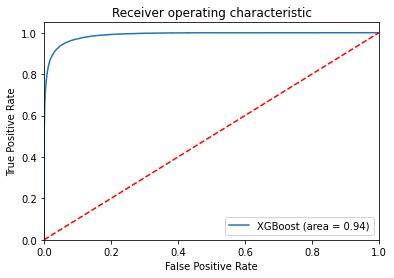

In [158]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [160]:
gbm = lgb.LGBMClassifier(learning_rate = 0.6,  n_estimators = 500, max_depth = 24, random_state=42, min_child_weight=1,metric='binary',boosting_type = 'dart')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.6, max_depth=24,
               metric='binary', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [162]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 83.23917891598181
Test Prediction Score 82.14065695768956


In [163]:
y_pred_gbm_test = gbm.predict(test_X)
gbm_score_test = accuracy_score(test_Y,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X1)
gbm_score_test = accuracy_score(test_Y1,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X2)
gbm_score_test = accuracy_score(test_Y2,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X3)
gbm_score_test = accuracy_score(test_Y3,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X4)
gbm_score_test = accuracy_score(test_Y4,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X5)
gbm_score_test = accuracy_score(test_Y5,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X6)
gbm_score_test = accuracy_score(test_Y6,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 52.059999999999995
Test Prediction Score 51.85666666666666
Test Prediction Score 57.00333333333333
Test Prediction Score 51.17
Test Prediction Score 49.63
Test Prediction Score 37.38666666666667
Test Prediction Score 50.19


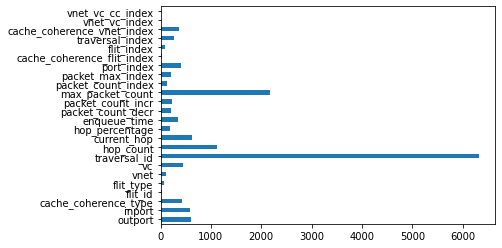

In [164]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

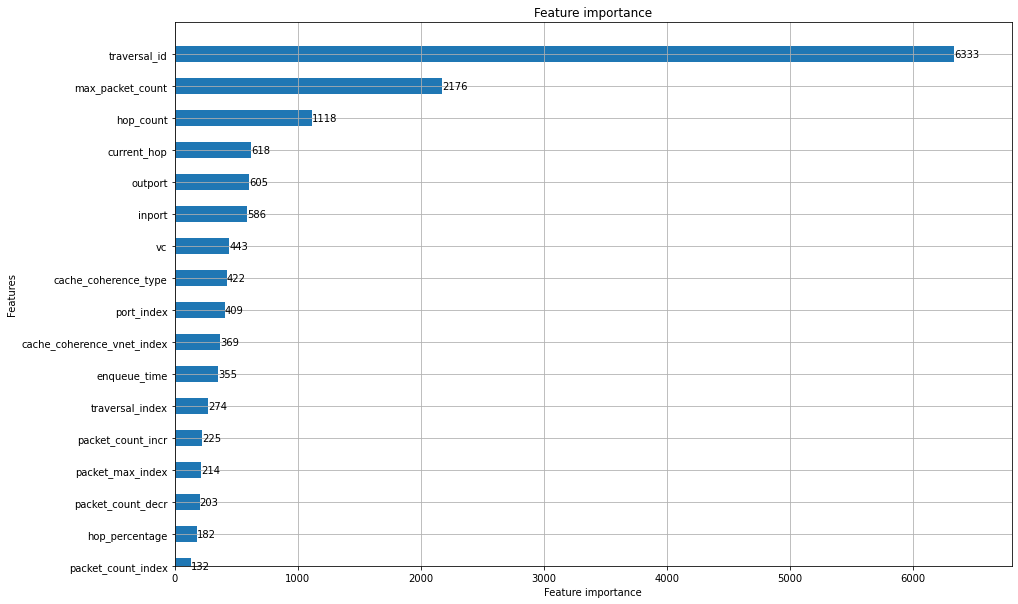

In [165]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,6800), ylim = (0,17), figsize = (15,10))
plt.show()

In [166]:
sorted(gbm.feature_importances_,reverse=True)

[6333,
 2176,
 1118,
 618,
 605,
 586,
 443,
 422,
 409,
 369,
 355,
 274,
 225,
 214,
 203,
 182,
 132,
 114,
 84,
 67,
 38,
 33,
 0,
 0]

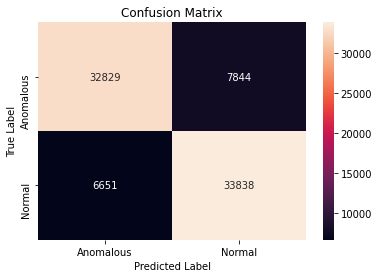

In [167]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [168]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82     40673
           1       0.81      0.84      0.82     40489

    accuracy                           0.82     81162
   macro avg       0.82      0.82      0.82     81162
weighted avg       0.82      0.82      0.82     81162



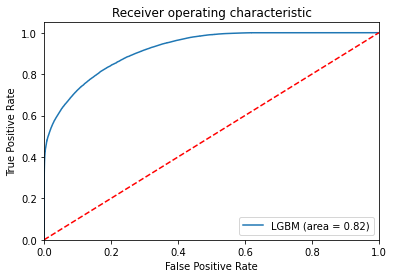

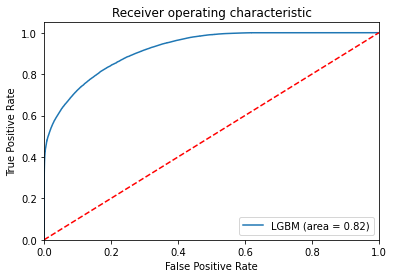

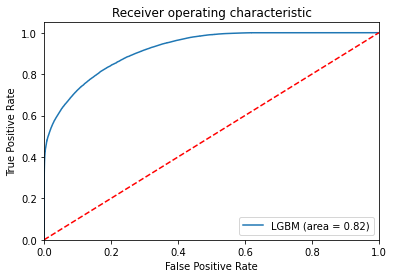

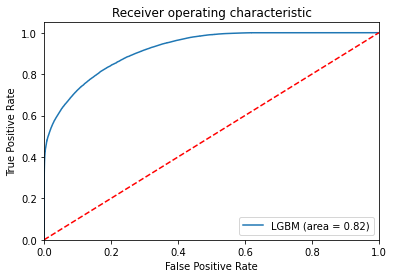

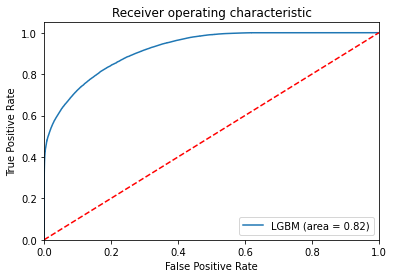

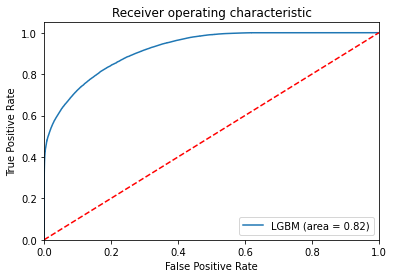

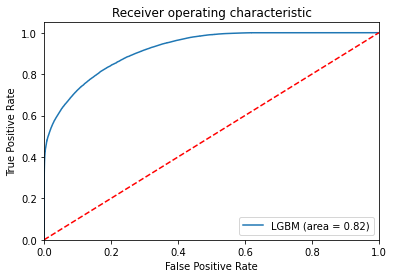

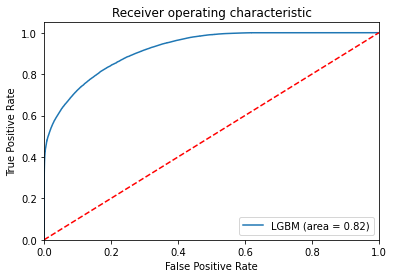

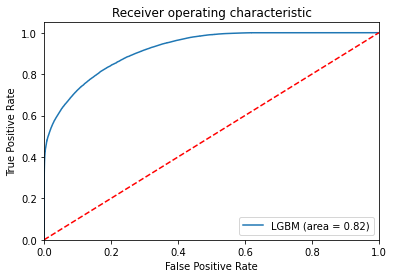

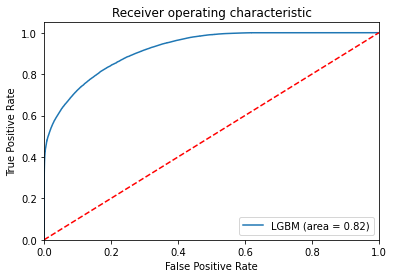

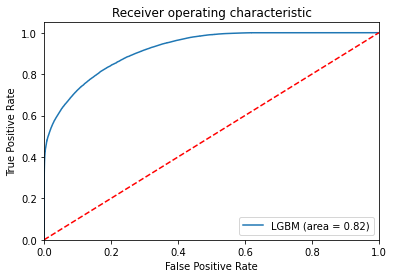

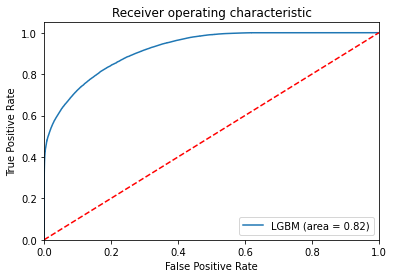

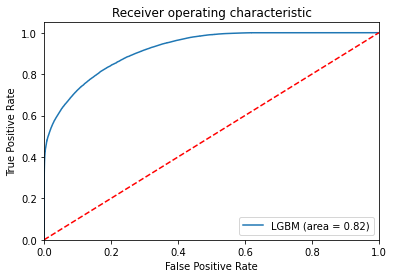

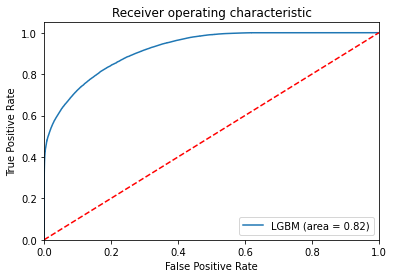

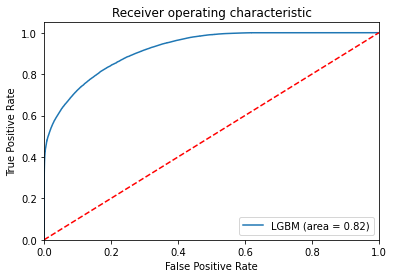

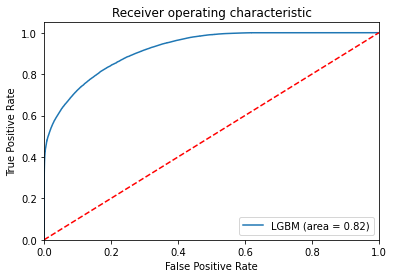

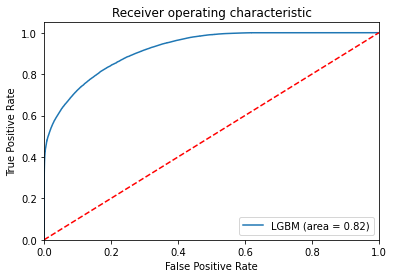

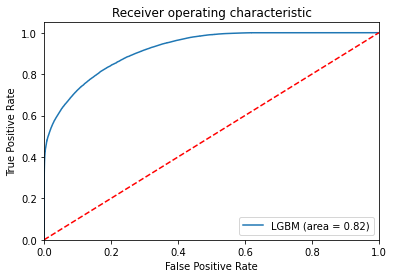

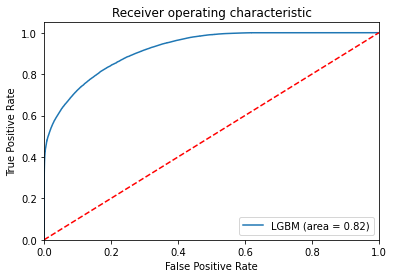

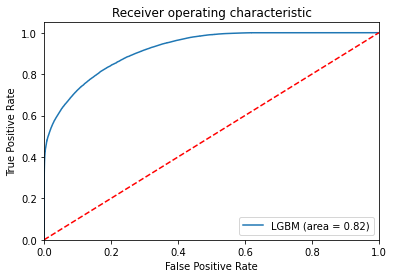

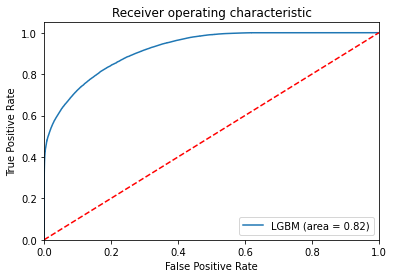

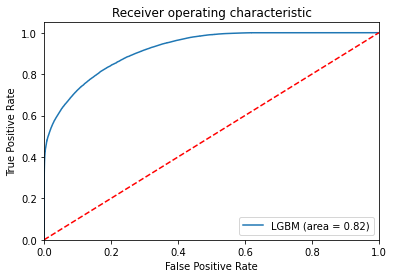

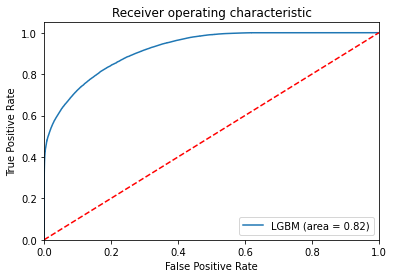

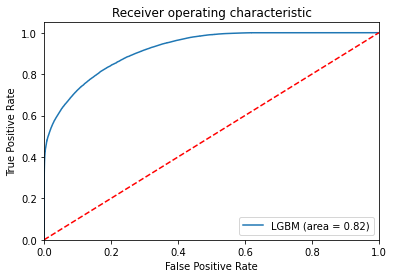

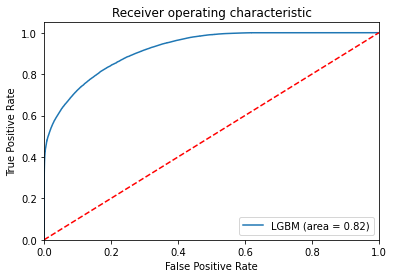

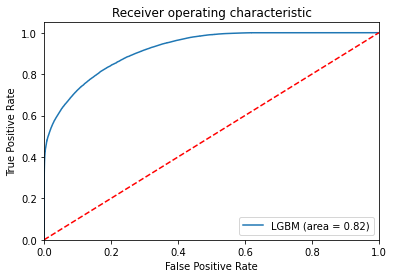

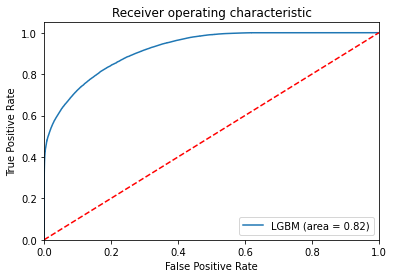

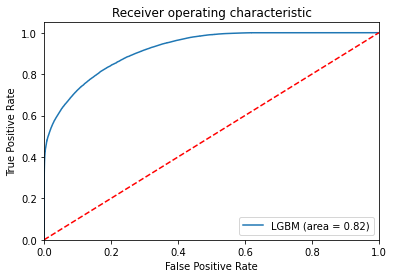

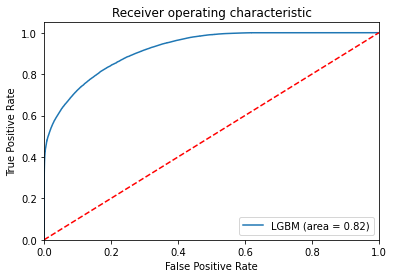

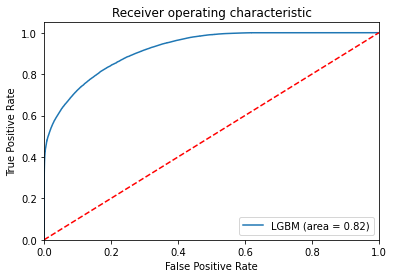

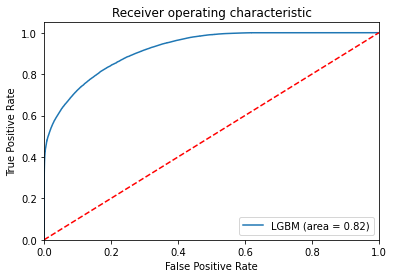

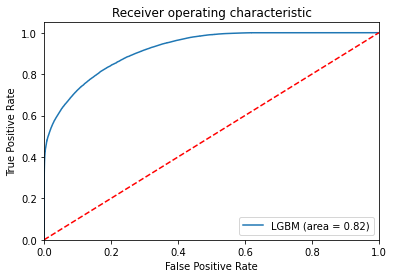

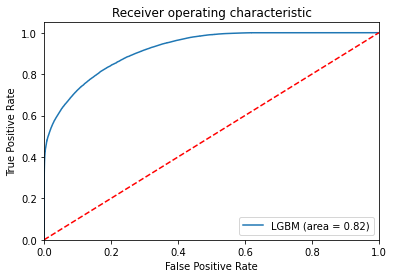

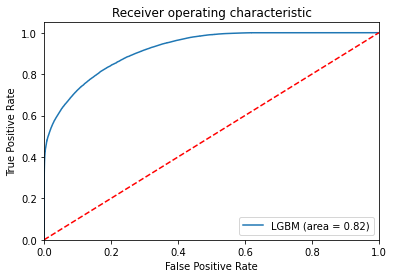

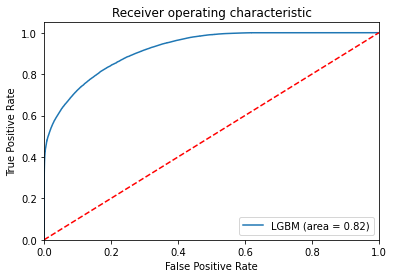

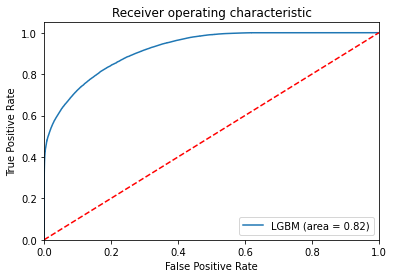

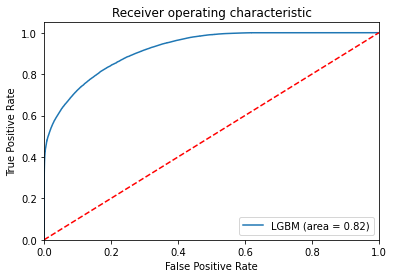

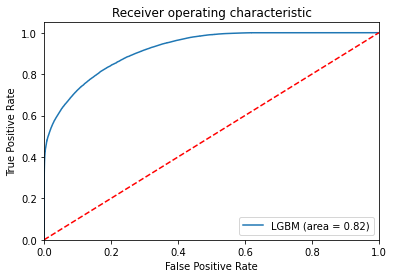

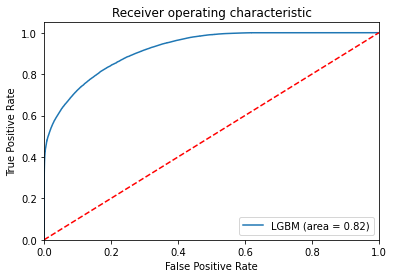

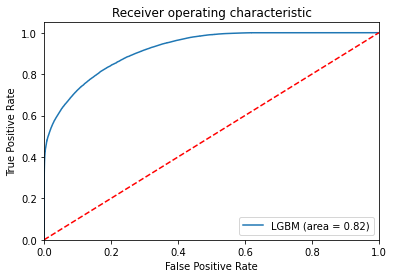

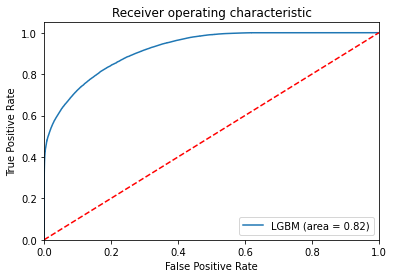

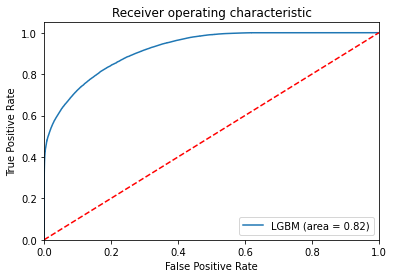

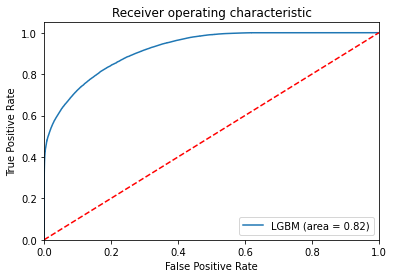

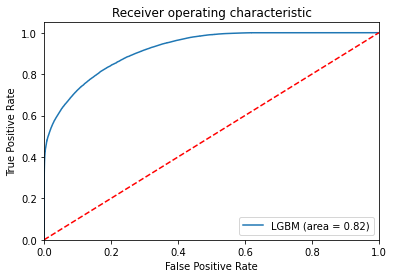

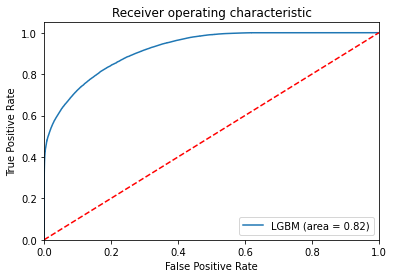

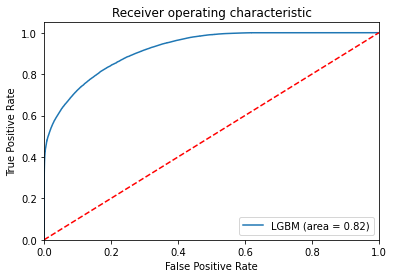

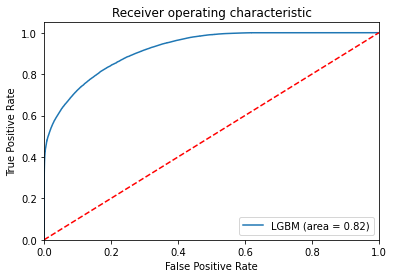

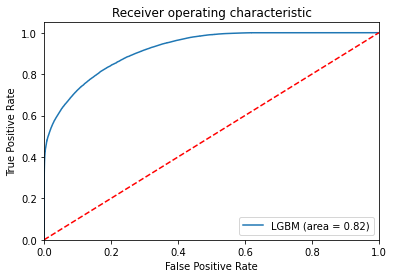

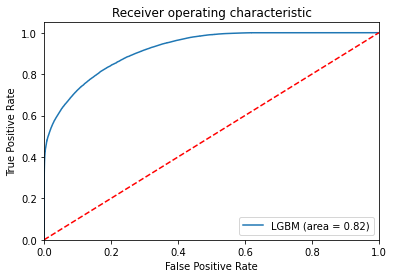

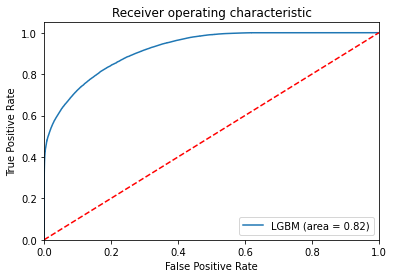

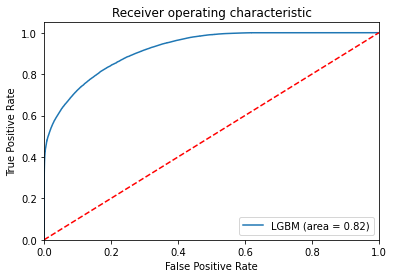

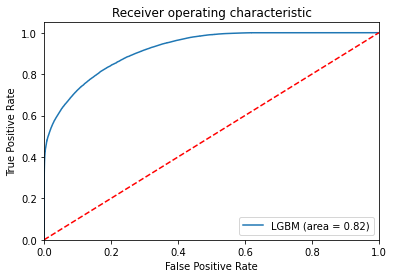

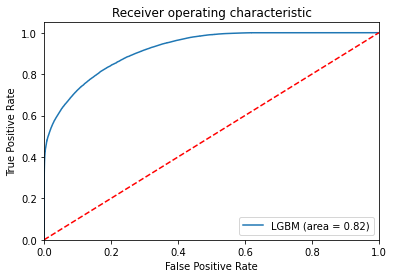

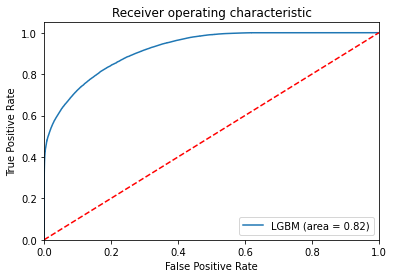

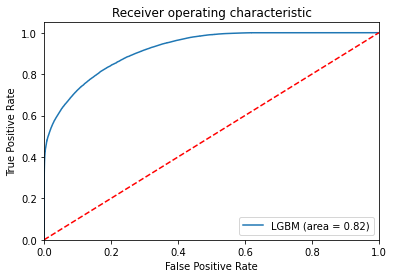

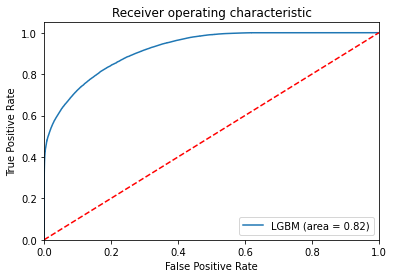

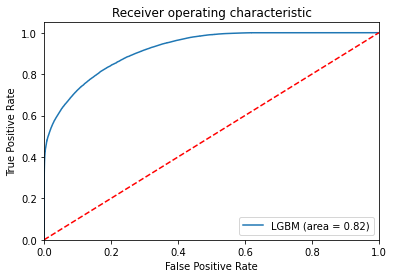

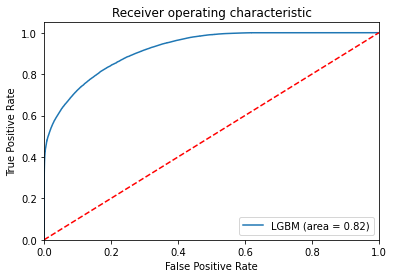

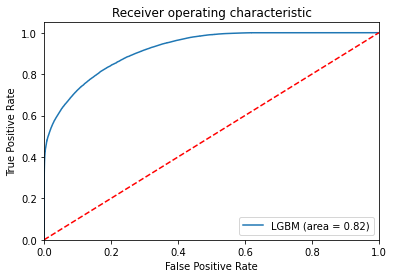

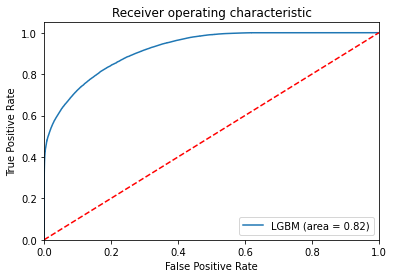

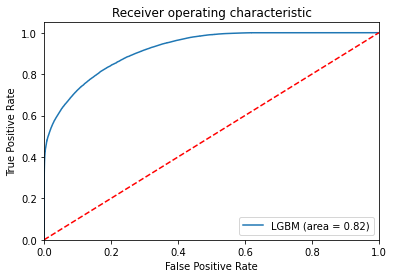

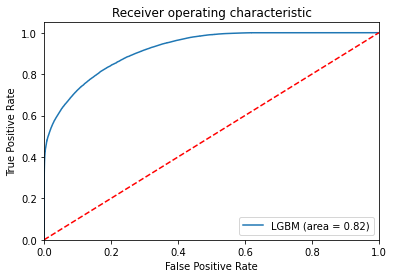

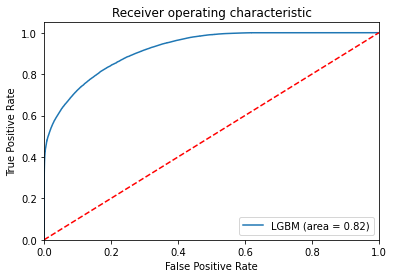

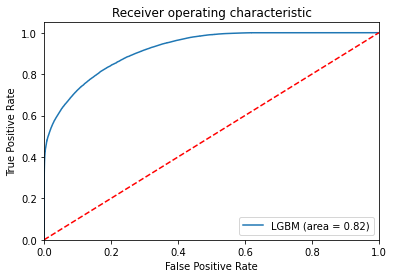

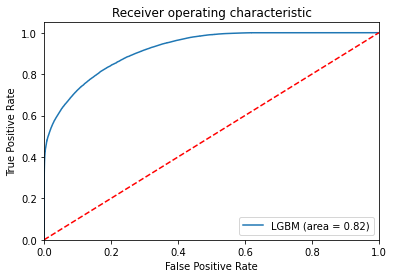

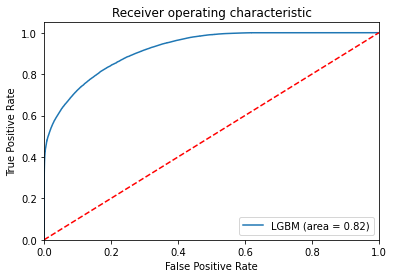

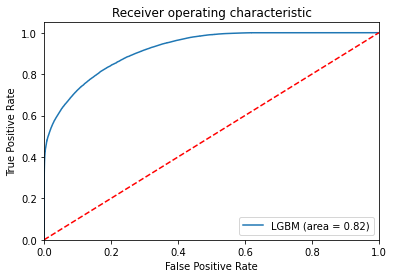

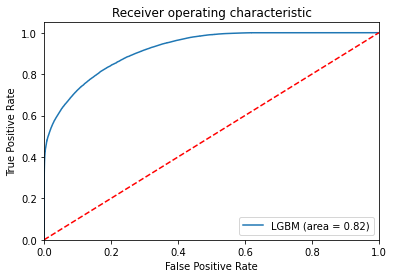

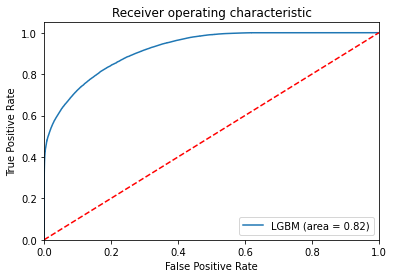

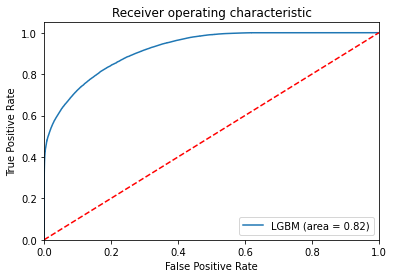

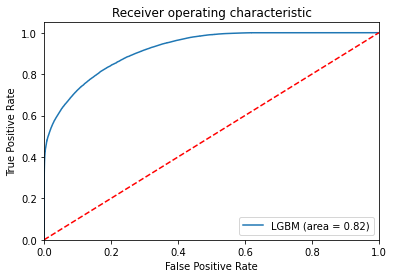

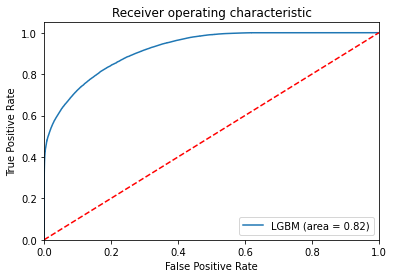

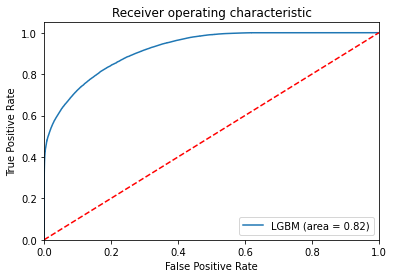

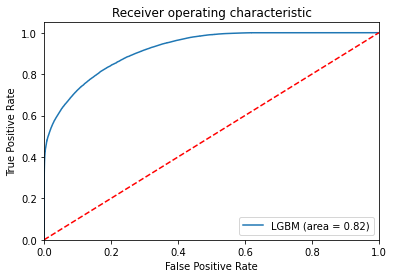

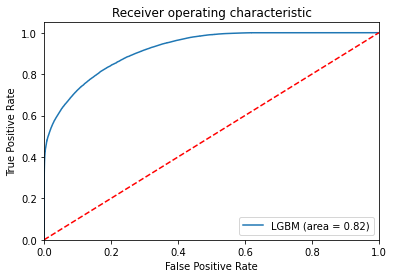

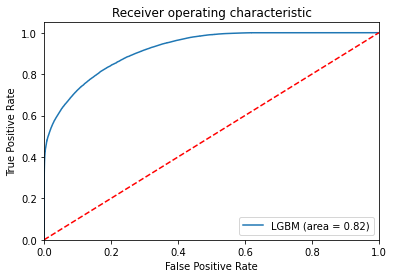

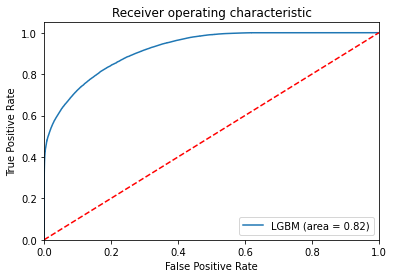

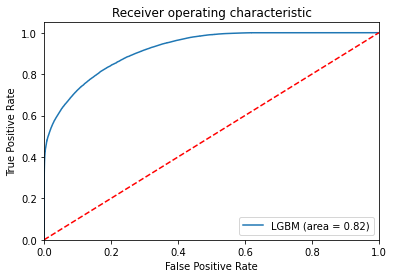

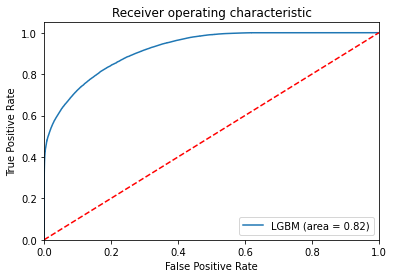

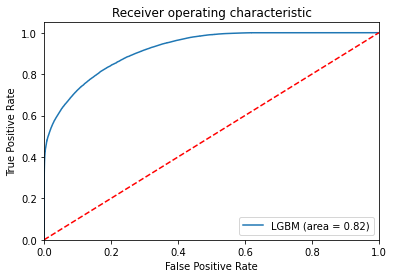

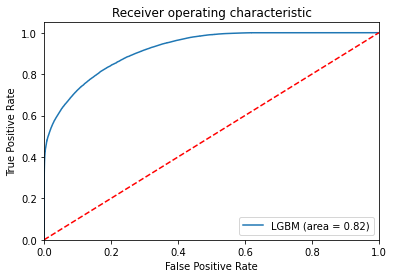

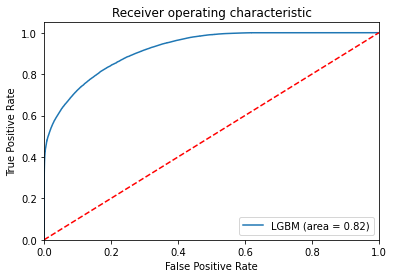

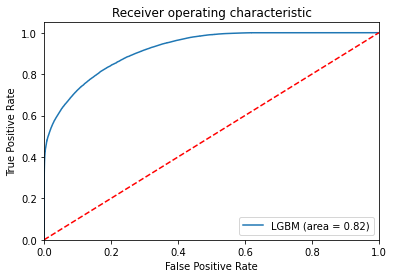

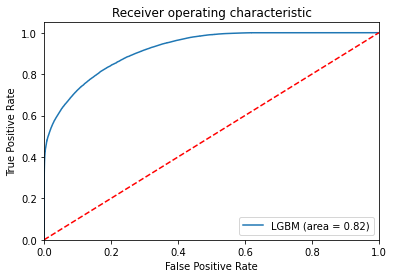

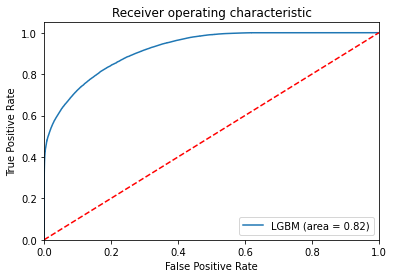

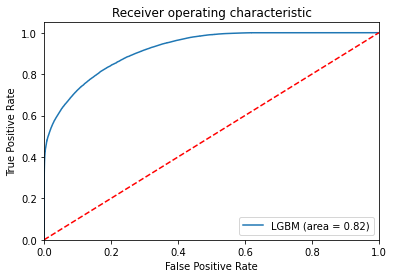

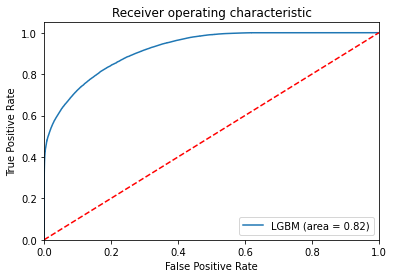

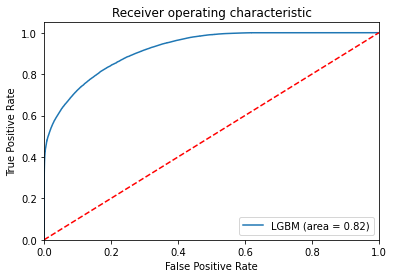

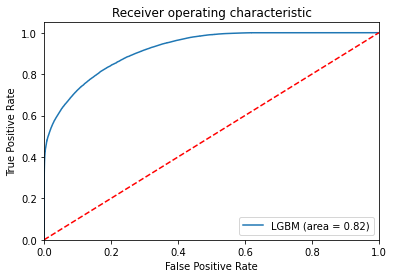

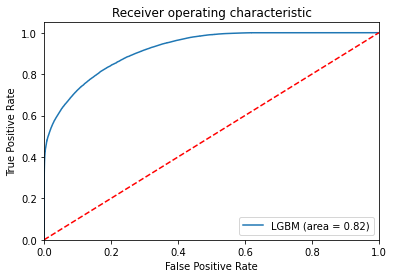

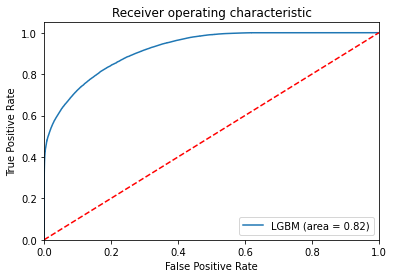

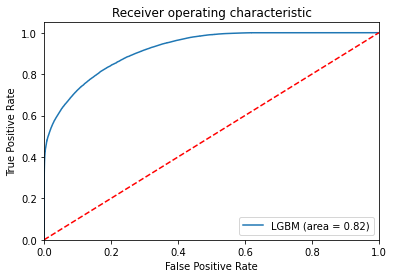

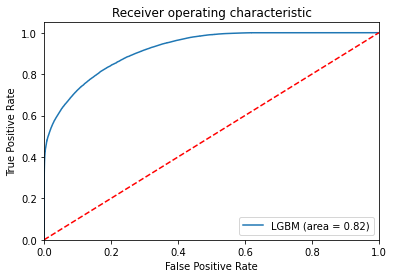

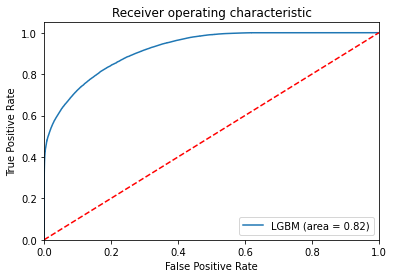

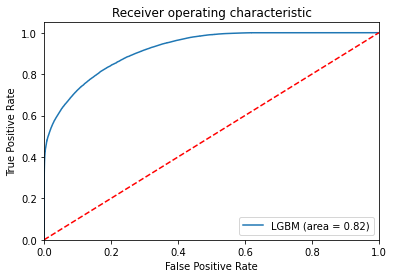

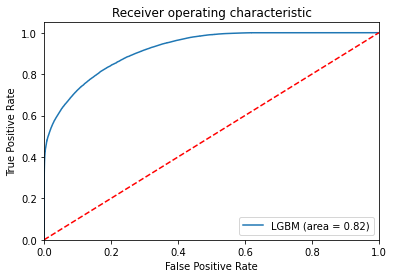

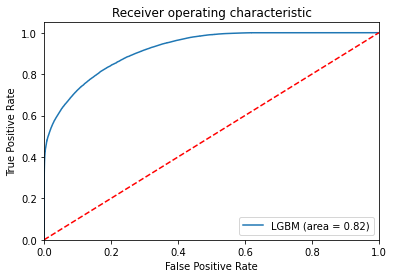

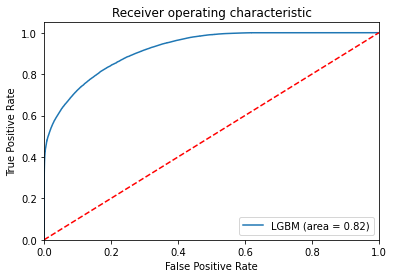

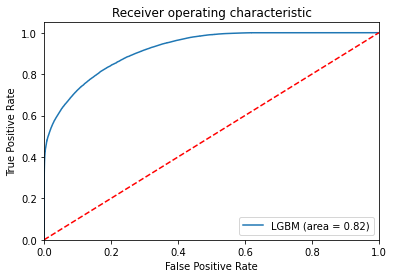

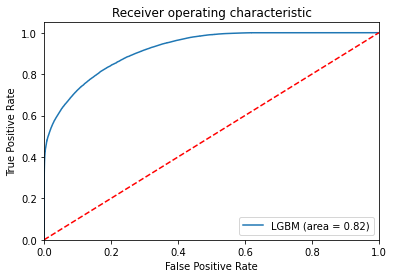

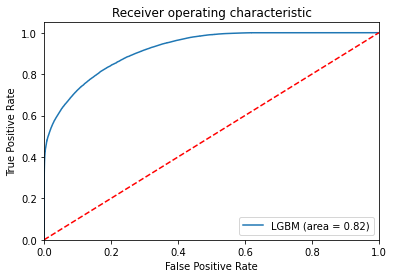

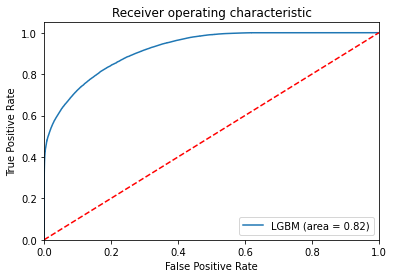

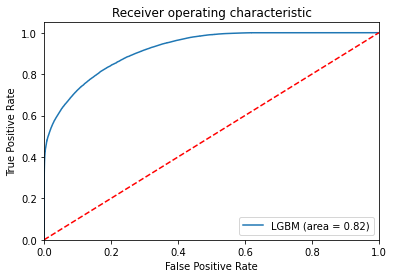

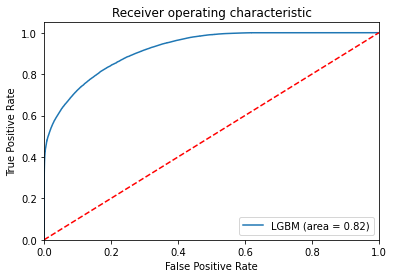

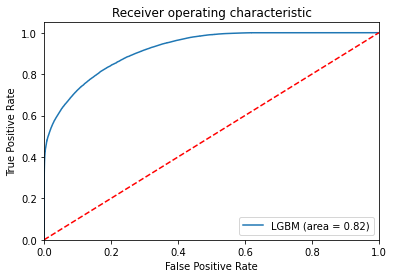

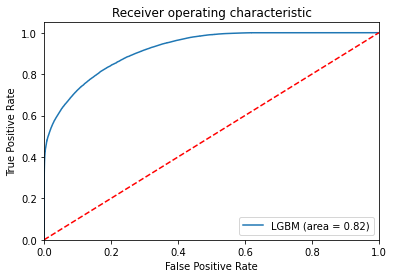

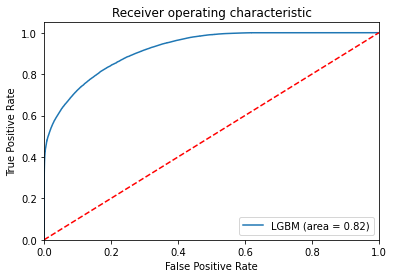

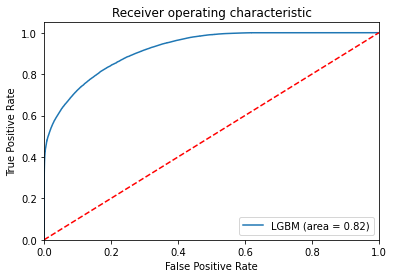

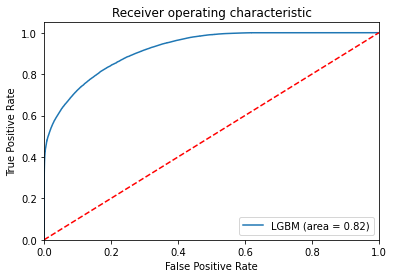

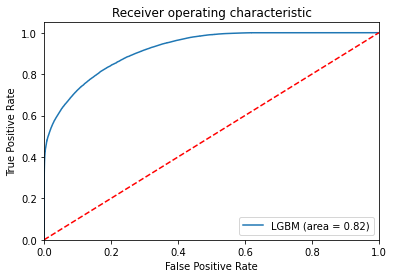

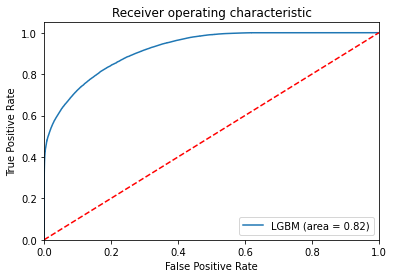

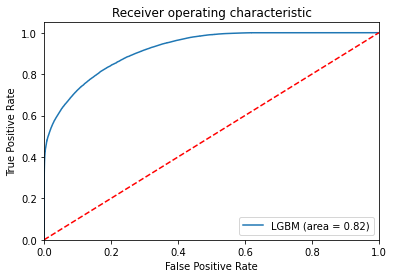

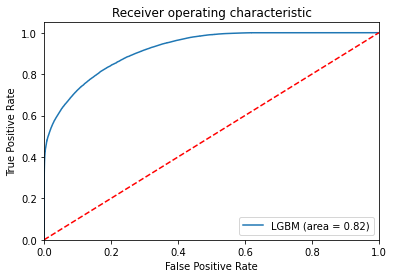

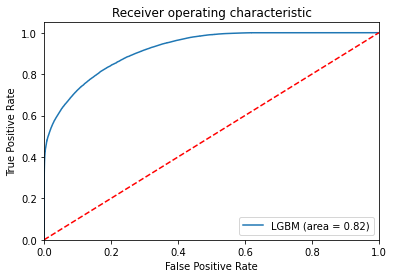

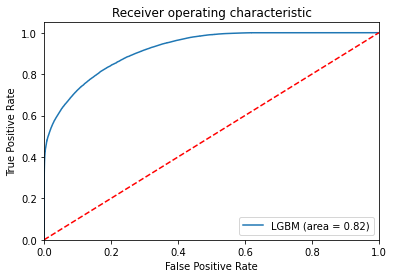

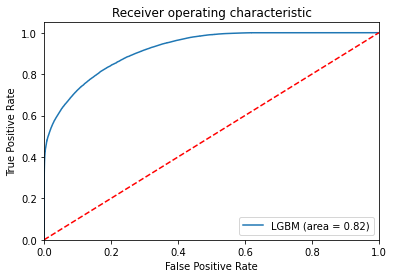

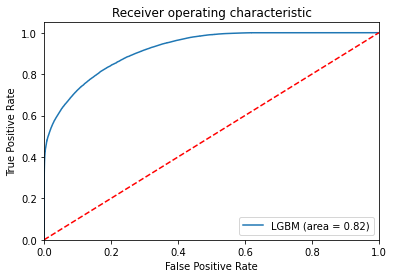

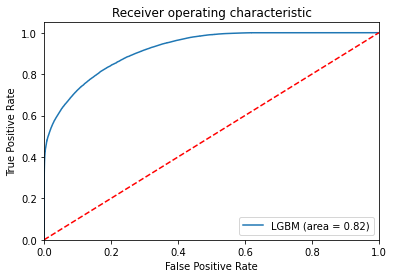

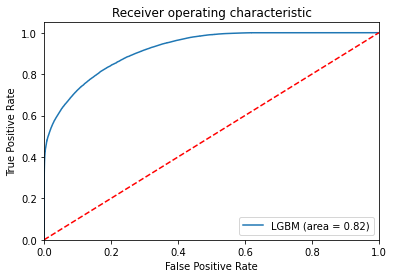

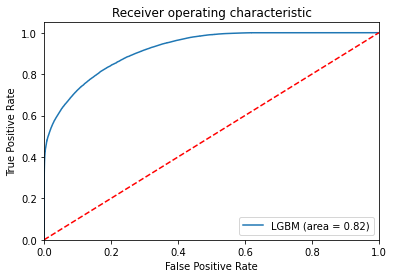

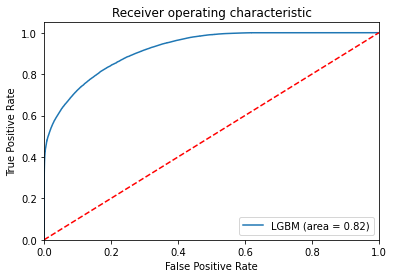

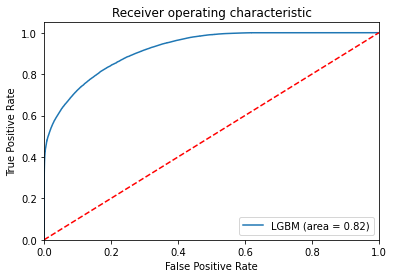

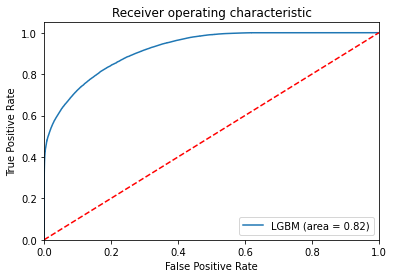

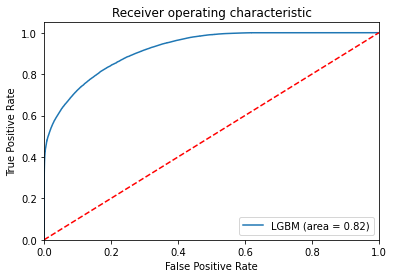

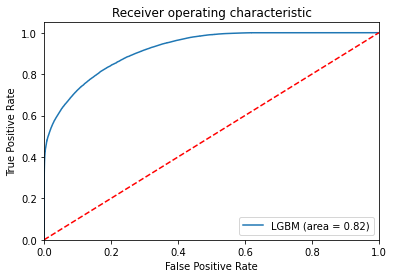

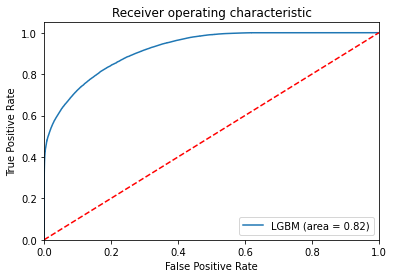

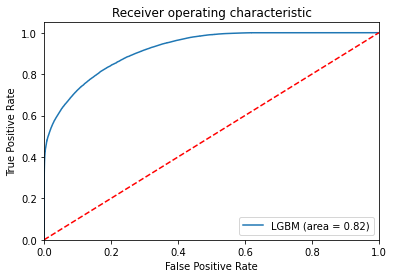

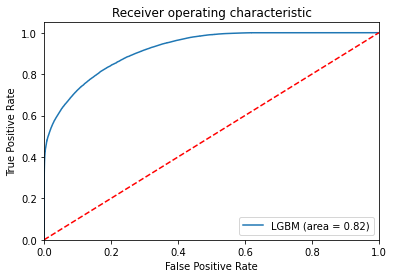

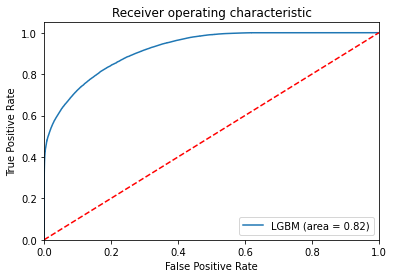

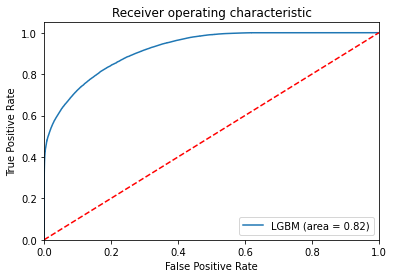

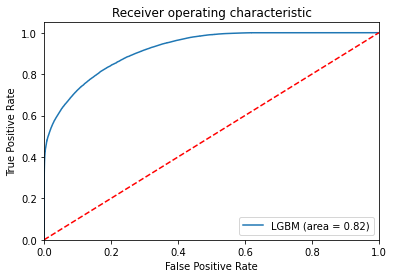

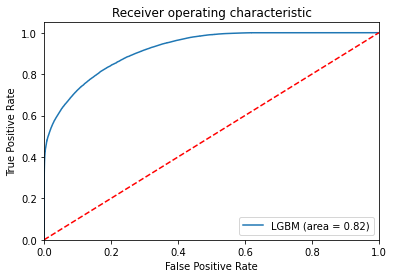

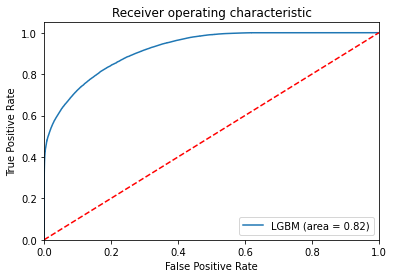

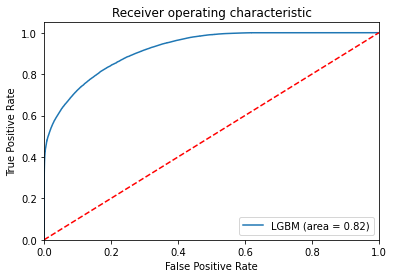

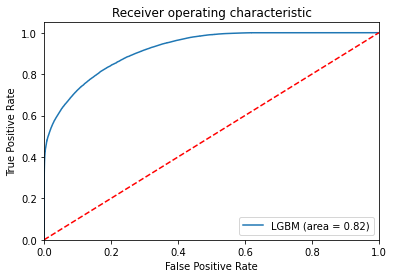

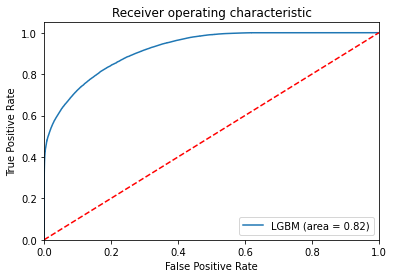

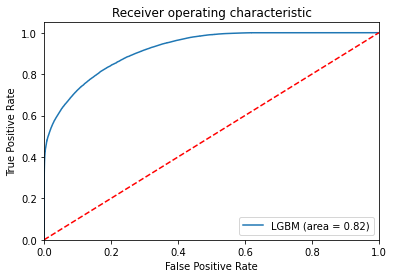

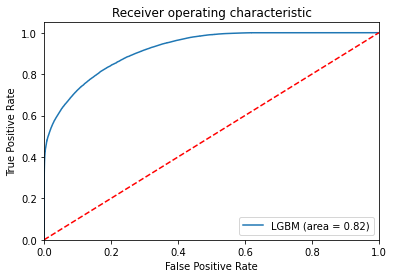

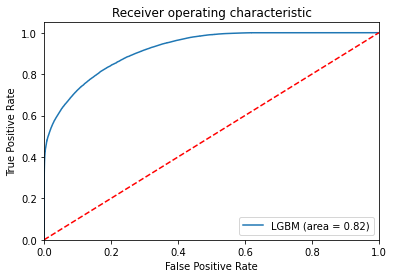

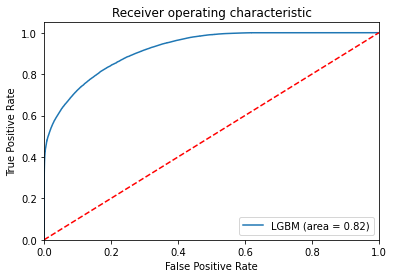

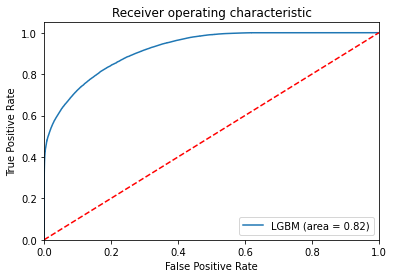

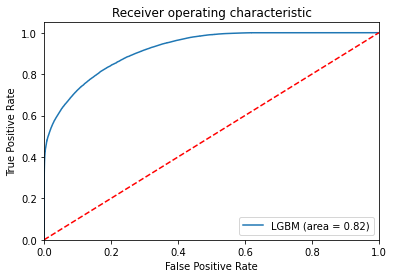

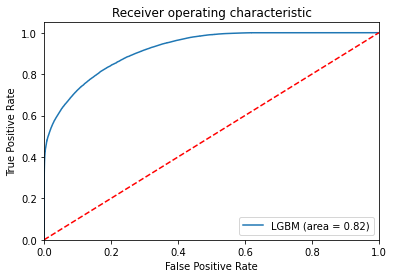

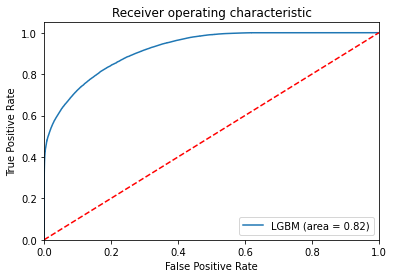

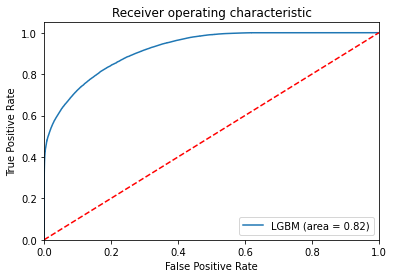

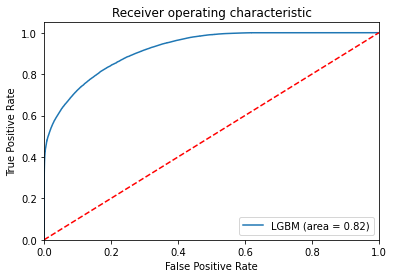

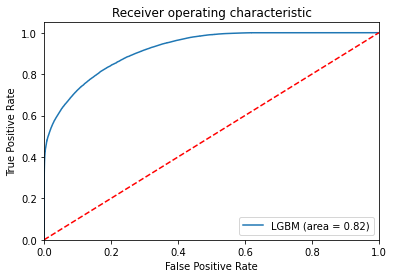

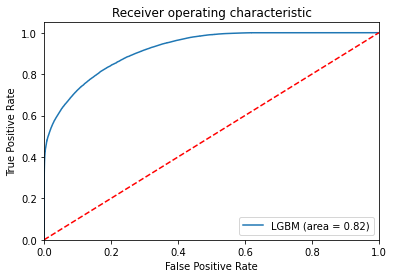

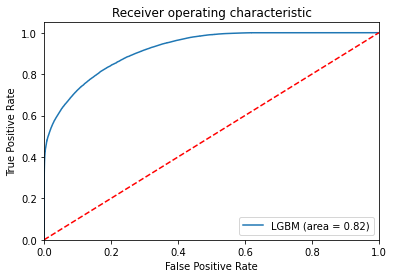

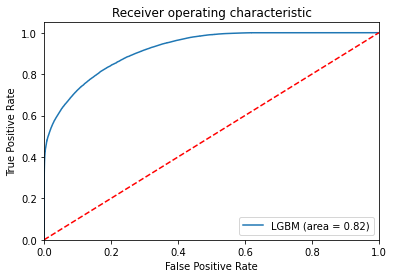

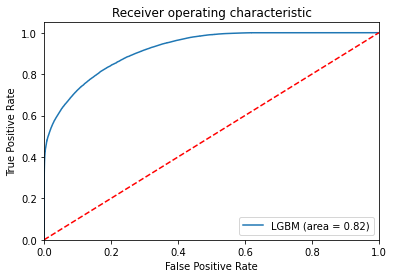

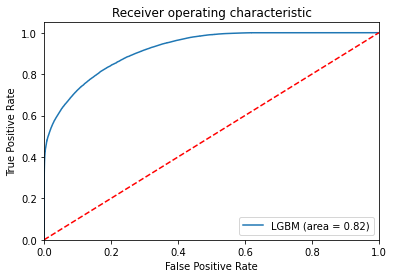

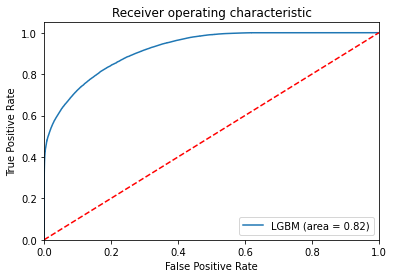

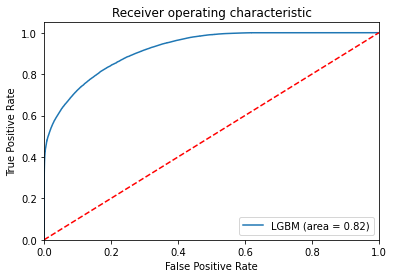

In [0]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()